# **Avito Data Mining Project**

* __Made by__: Mabrouk Ziyad **&** Quehlaoui Mohamed
* __Supervised by__: Pr. El Asri Ikram

### **Model Building:**

Now that we have cleaned and explored the dataset and gained insights into the relationships between different features and the target variable `Prix`, we can proceed with building predictive models using various machine learning algorithms. The goal is to predict the price of a car based on its features.

### Import necessary librairies:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the Avito dataset
avito_data = pd.read_csv("cleaned_avito_data.csv")

### Convert categorical features into numeric values using `Label Encoder`:

In [3]:
# convertir les variables catégoriques en variables numériques
LE=LabelEncoder()
LE.fit(avito_data["Marque"])
avito_data["Marque"]=LE.transform(avito_data["Marque"])

LE1=LabelEncoder()
LE1.fit(avito_data["Modèle"])
avito_data["Modèle"]=LE1.transform(avito_data["Modèle"])

LE2=LabelEncoder()
LE2.fit(avito_data["Carburant"])
avito_data["Carburant"]=LE2.transform(avito_data["Carburant"])

LE3=LabelEncoder()
LE3.fit(avito_data['Boite à vitesses'])
avito_data['Boite à vitesses']=LE3.transform(avito_data['Boite à vitesses'])

LE4=LabelEncoder()
LE4.fit(avito_data['Origine'])
avito_data['Origine']=LE4.transform(avito_data['Origine'])

LE6=LabelEncoder()
LE6.fit(avito_data['État'])
avito_data['État']=LE6.transform(avito_data['État'])

LE7=LabelEncoder()
LE7.fit(avito_data['Ville'])
avito_data['Ville']=LE7.transform(avito_data['Ville'])

LE8=LabelEncoder()
LE8.fit(avito_data['Secteur'])
avito_data['Secteur']=LE8.transform(avito_data['Secteur'])

LE9=LabelEncoder()
LE9.fit(avito_data['Type'])
avito_data['Type']=LE9.transform(avito_data['Type'])

LE10=LabelEncoder()
LE10.fit(avito_data['Année-Modèle'])
avito_data['Année-Modèle']=LE10.transform(avito_data['Année-Modèle'])

# drop the Titre and Vendeur columns
avito_data = avito_data.drop(['Titre', 'Vendeur'], axis=1)

avito_data.head()

,Prix,Ville,Carburant,Boite à vitesses,Puissance Fiscale,Nombre des images,Type,Secteur,Origine,État,...,Jantes Aluminium,Limiteur De Vitesse,Ordinateur De Bord,Radar De Recul,Régulateur De Vitesse,Sièges Cuir,Système De Navigation/GPS,Toit Ouvrant,Verrouillage Centralisé À Distance,Vitres Électriques
0,205000.0,48,2,0,8,9,0,169,3,4,...,1,1,1,1,1,0,1,1,1,1
1,680000.0,11,0,0,12,13,0,129,3,3,...,1,1,1,1,1,1,1,1,1,1
2,137000.0,0,0,1,6,13,0,23,2,5,...,1,1,1,1,1,1,1,0,1,1
3,95000.0,24,0,1,6,8,0,193,3,5,...,0,0,0,0,0,0,0,0,0,0
4,123000.0,48,0,1,6,5,0,174,3,3,...,0,0,0,0,0,0,0,0,0,0


### **PCA:**

In [4]:
# Preprocessing step: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(avito_data.values)

# Apply PCA with n_components=2
sklearn_pca = PCA(n_components=2)
reduced_data = sklearn_pca.fit_transform(scaled_data)

# Display the shapes of original and reduced data
print(avito_data.shape)
print(reduced_data.shape)

# Display the percentage of explained variance
print("Explained variance ratio:")
print(sklearn_pca.explained_variance_ratio_)

# Display the principal components
print("Principal components:")
print(sklearn_pca.components_)

(1679, 32)
(1679, 2)
Explained variance ratio:
[0.37816361 0.08558553]
Principal components:
[[-2.32947175e-02 -2.00587094e-02  1.63885855e-02  1.17631523e-01
  -2.77621555e-02 -7.14580520e-02 -3.08636704e-25 -2.42686431e-02
   4.39022304e-02 -2.51011266e-02 -6.53481249e-04 -3.08355163e-03
  -1.41128946e-02  6.04657846e-03  4.17126419e-02 -6.29947436e-03
  -2.65313748e-01 -2.62362279e-01 -2.61874786e-01 -2.23781597e-01
  -2.65054385e-01 -2.60099200e-01 -2.44519644e-01 -2.59487391e-01
  -2.63009491e-01 -2.49921082e-01 -2.63757696e-01 -1.92122861e-01
  -2.31846745e-01 -1.47365565e-01 -2.59954295e-01 -2.64253592e-01]
 [ 4.25304561e-01 -1.14168632e-01  1.98924848e-02 -3.42722848e-01
   2.92161626e-01  1.61296547e-01 -1.37599296e-20 -2.04386740e-02
  -4.65334167e-02 -1.51610238e-01 -4.42550426e-02  1.69529728e-01
   3.42867405e-01 -6.68392201e-02  2.94375644e-01 -2.79738792e-01
  -1.03964184e-01 -1.15735323e-01 -1.29192998e-01  1.44907242e-01
  -1.16288245e-01 -4.25047891e-02  5.65149492e-0

In [5]:
# Apply PCA with different numbers of components and display explained variance ratio
for i in range(3, 11):
    sklearn_pca = PCA(n_components=i)
    reduced_data = sklearn_pca.fit_transform(scaled_data)
    print("Explained variance ratio for", i, "principal components:")
    print(sum(sklearn_pca.explained_variance_ratio_)*100, "%")

Explained variance ratio for 3 principal components:
52.8774044951452 %
Explained variance ratio for 4 principal components:
57.010605673407944 %
Explained variance ratio for 5 principal components:
60.8422622359555 %
Explained variance ratio for 6 principal components:
64.27570777692722 %
Explained variance ratio for 7 principal components:
67.69101858171432 %
Explained variance ratio for 8 principal components:
70.89711350881707 %
Explained variance ratio for 9 principal components:
73.83548264906055 %
Explained variance ratio for 10 principal components:
76.6363947302044 %


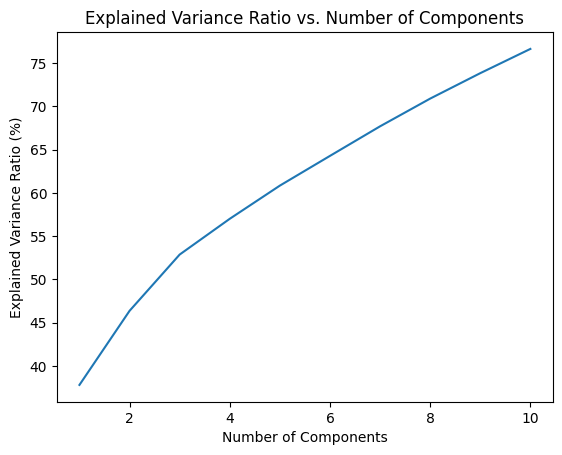

In [6]:
# Visualize the explained variance ratio for different numbers of components
X = [i for i in range(1, 11)]
Y = []
for i in range(1, 11):
    sklearn_pca = PCA(n_components=i)
    reduced_data = sklearn_pca.fit_transform(scaled_data)
    Y.append(sum(sklearn_pca.explained_variance_ratio_)*100)

plt.plot(X, Y)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio (%)')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

### Constructing the models and evaluating them:

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings

In [8]:
# Data Preprocessing
# 'Prix' is the target column
target_column_index = 0
y = avito_data.iloc[:, target_column_index]  # Extracting the target column
X = avito_data.drop(columns=['Prix'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

warnings.filterwarnings("ignore")

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)
    results[name] = scores.mean()

# Display results
for name, score in results.items():
    print(f"{name}: Mean Accuracy = {score:.2f}")

# Retrain the best classifier and evaluate on the test set
best_classifier = max(results, key=results.get)
clf = classifiers[best_classifier]
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nBest Classifier ({best_classifier}): Test Accuracy = {test_accuracy:.2f}")

Random Forest: Mean Accuracy = 0.03
Support Vector Machine: Mean Accuracy = 0.03
K-Nearest Neighbors: Mean Accuracy = 0.02
Logistic Regression: Mean Accuracy = 0.02
Decision Tree: Mean Accuracy = 0.02
Naive Bayes: Mean Accuracy = 0.01

Best Classifier (Random Forest): Test Accuracy = 0.02


In [9]:
# Drop the 'Ville' and 'Secteur' columns
avito_data = avito_data.drop(columns=['Ville', 'Secteur'])
avito_data.head()

,Prix,Carburant,Boite à vitesses,Puissance Fiscale,Nombre des images,Type,Origine,État,Marque,Modèle,...,Jantes Aluminium,Limiteur De Vitesse,Ordinateur De Bord,Radar De Recul,Régulateur De Vitesse,Sièges Cuir,Système De Navigation/GPS,Toit Ouvrant,Verrouillage Centralisé À Distance,Vitres Électriques
0,205000.0,2,0,8,9,0,3,4,38,89,...,1,1,1,1,1,0,1,1,1,1
1,680000.0,0,0,12,13,0,3,3,21,196,...,1,1,1,1,1,1,1,1,1,1
2,137000.0,0,1,6,13,0,2,5,8,39,...,1,1,1,1,1,1,1,0,1,1
3,95000.0,0,1,6,8,0,3,5,8,43,...,0,0,0,0,0,0,0,0,0,0
4,123000.0,0,1,6,5,0,3,3,15,283,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Split the data into features (X) and target variable (y)
X = avito_data.drop(columns=['Prix'])
y = avito_data['Prix']
y

0       205000.0
1       680000.0
2       137000.0
3        95000.0
4       123000.0
          ...   
1674    125000.0
1675    190000.0
1676     76000.0
1677    311000.0
1678    319000.0
Name: Prix, Length: 1679, dtype: float64

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

**Without scaling:**

In [12]:
# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    results[name] = scores.mean()

warnings.filterwarnings("ignore")

# Display results
for name, score in results.items():
    print(f"{name}: Mean Accuracy = {score:.2f}")

# Retrain the best classifier and evaluate on the test set
best_classifier = max(results, key=results.get)
clf = classifiers[best_classifier]
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nBest Classifier ({best_classifier}): Test Accuracy = {test_accuracy:.2f}")


Random Forest: Mean Accuracy = 0.03
Support Vector Machine: Mean Accuracy = 0.01
K-Nearest Neighbors: Mean Accuracy = 0.01
Logistic Regression: Mean Accuracy = 0.02
Decision Tree: Mean Accuracy = 0.03

Best Classifier (Random Forest): Test Accuracy = 0.01


**With scaling:**

In [13]:
# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)
    results[name] = scores.mean()

warnings.filterwarnings("ignore")

# Display results
for name, score in results.items():
    print(f"{name}: Mean Accuracy = {score:.2f}")

# Retrain the best classifier and evaluate on the test set
best_classifier = max(results, key=results.get)
clf = classifiers[best_classifier]
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nBest Classifier ({best_classifier}): Test Accuracy = {test_accuracy:.2f}")


Random Forest: Mean Accuracy = 0.03
Support Vector Machine: Mean Accuracy = 0.02
K-Nearest Neighbors: Mean Accuracy = 0.02
Logistic Regression: Mean Accuracy = 0.02
Decision Tree: Mean Accuracy = 0.03

Best Classifier (Random Forest): Test Accuracy = 0.02


As we can see, the models trained using scaled data perform better that the ones trained with unscaled data.

But the the models seem to be performing really bad. That might be the result of not having sufficient data to train and test the models properly.

In [14]:
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings("ignore")

# evaluate classifiers with mean absolute error
results = {}
for name, clf in classifiers.items():
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = mae

# Display results
for name, mae in results.items():
    print(f"{name}: Mean Absolute Error = {mae:.2f}")

Random Forest: Mean Absolute Error = 98797.92
Support Vector Machine: Mean Absolute Error = 119163.98
K-Nearest Neighbors: Mean Absolute Error = 125422.92
Logistic Regression: Mean Absolute Error = 127720.52
Decision Tree: Mean Absolute Error = 86366.67


The absolute value of the MAE indicates the average magnitude of the errors between the predicted and actual values. A lower MAE indicates that, on average, the model's predictions are closer to the actual values.

### **Example:**

In [15]:
avito_data.columns

Index(['Prix', 'Carburant', 'Boite à vitesses', 'Puissance Fiscale',
       'Nombre des images', 'Type', 'Origine', 'État', 'Marque', 'Modèle',
       'Année-Modèle', 'Nombre de portes', 'Première main', 'Kilométrage',
       'ABS', 'Airbags', 'CD/MP3/Bluetooth', 'Caméra De Recul',
       'Climatisation', 'ESP', 'Jantes Aluminium', 'Limiteur De Vitesse',
       'Ordinateur De Bord', 'Radar De Recul', 'Régulateur De Vitesse',
       'Sièges Cuir', 'Système De Navigation/GPS', 'Toit Ouvrant',
       'Verrouillage Centralisé À Distance', 'Vitres Électriques'],
      dtype='object')

In [16]:
avito_data['Modèle'].value_counts()

Modèle
88     67
232    39
78     36
101    33
154    32
       ..
301     1
279     1
41      1
56      1
87      1
Name: count, Length: 310, dtype: int64

In [17]:
# get the original value of the 'Modèle' column
LE1.inverse_transform([88])

array(['Clio'], dtype=object)

In [18]:
avito_data['Marque'].value_counts()

Marque
39    196
26    154
32    150
30    111
11    110
5     102
15     96
4      78
21     77
8      68
13     64
12     62
29     53
38     48
20     40
34     32
19     31
40     30
28     30
3      21
33     20
31     19
18     16
14     15
24      9
41      8
27      5
22      5
35      4
7       4
36      3
6       3
1       3
23      2
25      2
10      2
0       1
9       1
16      1
17      1
37      1
2       1
Name: count, dtype: int64

In [19]:
# get the original value of the 'Marque' column
LE.inverse_transform([32])

array(['Renault'], dtype=object)

In [20]:
carburant = 0
boite_vitesses = 0
puissance_fiscale = 6
nombre_images = 5
type = 0
origine = 3
etat = 5
marque = 32 # corresponds to 'Renault'
modele = 88 # corresdonds to 'Clio'
annee_modele = 27 # corresponds to '2015'
nombre_portes = 5
premiere_main = 0
kilometrage = 100000
abs = 1
airbags = 1
cd_mp3_bluetooth = 1
camera_de_recule = 0
climatisation = 1
esp = 1
jantes_aluminium = 1
limiteur_de_vitesse = 1
ordinateur_de_bord = 0
radar_de_recule = 0
regulateur_de_vitesse = 1
sieges_cuir = 0
systeme_de_navigation_gps = 0
toit_ouvrant = 0
verrouillage_centralise_a_distance = 1
vitres_electriques = 1

# Create a new example
X_example = np.array([[carburant, boite_vitesses, puissance_fiscale, nombre_images, type, origine, etat, marque, modele, annee_modele, 
                       nombre_portes, premiere_main, kilometrage, abs, airbags, cd_mp3_bluetooth, camera_de_recule, climatisation, esp, 
                       jantes_aluminium, limiteur_de_vitesse, ordinateur_de_bord, radar_de_recule, regulateur_de_vitesse, sieges_cuir, 
                       systeme_de_navigation_gps, toit_ouvrant, verrouillage_centralise_a_distance, vitres_electriques]])

# Suppress warnings
warnings.filterwarnings("ignore")

# Make a prediction
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_example)
    print(f"{name}: Prediction = {prediction[0]} DH")

Random Forest: Prediction = 110000.0 DH
Support Vector Machine: Prediction = 155000.0 DH
K-Nearest Neighbors: Prediction = 110000.0 DH
Logistic Regression: Prediction = 115000.0 DH
Decision Tree: Prediction = 118000.0 DH


In [21]:
LE10.inverse_transform([27])

array(['2015-01-01'], dtype=object)

In [22]:
# print data rows where the 'Modèle' is 88 and the 'Marque' is 32
avito_data[(avito_data['Modèle'] == 88) & (avito_data['Année-Modèle'] == 27)].describe()

,Prix,Carburant,Boite à vitesses,Puissance Fiscale,Nombre des images,Type,Origine,État,Marque,Modèle,...,Jantes Aluminium,Limiteur De Vitesse,Ordinateur De Bord,Radar De Recul,Régulateur De Vitesse,Sièges Cuir,Système De Navigation/GPS,Toit Ouvrant,Verrouillage Centralisé À Distance,Vitres Électriques
count,3.000000,3.0,3.0,3.0,3.000000,3.0,3.0,3.000000,3.0,3.0,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000
mean,112666.666667,0.0,1.0,6.0,6.333333,0.0,3.0,4.333333,32.0,88.0,...,0.666667,0.666667,0.333333,0.666667,0.333333,0.0,0.333333,0.333333,0.333333,0.666667
std,16441.816607,0.0,0.0,0.0,2.081666,0.0,0.0,0.577350,0.0,0.0,...,0.577350,0.577350,0.577350,0.577350,0.577350,0.0,0.577350,0.577350,0.577350,0.577350
min,94000.000000,0.0,1.0,6.0,4.000000,0.0,3.0,4.000000,32.0,88.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,106500.000000,0.0,1.0,6.0,5.500000,0.0,3.0,4.000000,32.0,88.0,...,0.500000,0.500000,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000
50%,119000.000000,0.0,1.0,6.0,7.000000,0.0,3.0,4.000000,32.0,88.0,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
75%,122000.000000,0.0,1.0,6.0,7.500000,0.0,3.0,4.500000,32.0,88.0,...,1.000000,1.000000,0.500000,1.000000,0.500000,0.0,0.500000,0.500000,0.500000,1.000000
max,125000.000000,0.0,1.0,6.0,8.000000,0.0,3.0,5.000000,32.0,88.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


The estimated value seems pretty good.

### **Let's use a bigger dataset:**

In [22]:
# Load the dataset
avito_data = pd.read_csv("cleaned_avito_data_all.csv")
avito_data.head()

,Prix,Ville,Marque,Modèle,Année-Modèle,Kilométrage,Carburant,Puissance fiscale,Boite à vitesses,Nombre de portes,...,Radar de recul,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance
0,60000,Temara,Fiat,Punto,2007,224999.5,Diesel,5,Manuelle,5,...,0,0,0,1,0,0,0,1,0,0
1,70000,Temara,Dacia,Dokker Van,2013,424999.5,Diesel,6,Manuelle,3,...,0,0,0,0,0,0,0,0,0,0
2,90000,Casablanca,Volkswagen,Touareg,2005,2499.5,Diesel,10,Automatique,5,...,0,0,0,0,0,0,0,0,0,0
3,97000,Dakhla,Toyota,Prado,2007,224999.5,Diesel,12,Manuelle,5,...,0,0,0,1,0,0,0,1,0,0
4,255000,Khouribga,Volkswagen,Tiguan,2014,184999.5,Diesel,8,Automatique,5,...,0,0,0,1,1,0,0,1,0,0


In [23]:
LE=LabelEncoder()
LE.fit(avito_data["Marque"])
avito_data["Marque"]=LE.transform(avito_data["Marque"])

LE1=LabelEncoder()
LE1.fit(avito_data["Modèle"])
avito_data["Modèle"]=LE1.transform(avito_data["Modèle"])

LE2=LabelEncoder()
LE2.fit(avito_data["Carburant"])
avito_data["Carburant"]=LE2.transform(avito_data["Carburant"])

LE3=LabelEncoder()
LE3.fit(avito_data['Boite à vitesses'])
avito_data['Boite à vitesses']=LE3.transform(avito_data['Boite à vitesses'])

LE4=LabelEncoder()
LE4.fit(avito_data['Origine'])
avito_data['Origine']=LE4.transform(avito_data['Origine'])

LE6=LabelEncoder()
LE6.fit(avito_data['État'])
avito_data['État']=LE6.transform(avito_data['État'])

LE10=LabelEncoder()
LE10.fit(avito_data['Année-Modèle'])
avito_data['Année-Modèle']=LE10.transform(avito_data['Année-Modèle'])

LE11=LabelEncoder()
LE11.fit(avito_data['Ville'])
avito_data['Ville']=LE11.transform(avito_data['Ville'])


avito_data.head()

,Prix,Ville,Marque,Modèle,Année-Modèle,Kilométrage,Carburant,Puissance fiscale,Boite à vitesses,Nombre de portes,...,Radar de recul,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance
0,60000,147,6,240,17,224999.5,0,5,1,5,...,0,0,0,1,0,0,0,1,0,0
1,70000,147,5,142,23,424999.5,0,6,1,3,...,0,0,0,0,0,0,0,0,0,0
2,90000,40,21,293,15,2499.5,0,10,0,5,...,0,0,0,0,0,0,0,0,0,0
3,97000,43,20,239,17,224999.5,0,12,1,5,...,0,0,0,1,0,0,0,1,0,0
4,255000,73,21,291,24,184999.5,0,8,0,5,...,0,0,0,1,1,0,0,1,0,0


In [25]:
target_column_index = 0
y = avito_data.iloc[:, target_column_index]
X = avito_data.drop(columns=['Prix'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

warnings.filterwarnings("ignore")

results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    results[name] = scores.mean()

for name, score in results.items():
    print(f"{name}: Mean Accuracy = {score:.2f}")

best_classifier = max(results, key=results.get)
clf = classifiers[best_classifier]
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nBest Classifier ({best_classifier}): Test Accuracy = {test_accuracy:.2f}")

Random Forest: Mean Accuracy = 0.89
Support Vector Machine: Mean Accuracy = 0.04
K-Nearest Neighbors: Mean Accuracy = 0.22
Logistic Regression: Mean Accuracy = 0.03
Decision Tree: Mean Accuracy = 0.89
Naive Bayes: Mean Accuracy = 0.07

Best Classifier (Random Forest): Test Accuracy = 0.96


### The best classifier in this case was `Random Forest`, with a final accuracy score of `96%`.